# Linear Regression Function Dictionary

A repository of functions that can be used surrounding the topic of linear regression.
<br>
<br>Function List:
1. Standard Unit Conversion
    1. From Scratch
        1. standard_units(x)
2. Correlation
    1. From Scratch: 
        1. correlation(table, col_x, col_y)
    2. Pandas
        1. df.corr()
3. Finding Slope
    1. From Scratch 
        1. slope(table, col_x, col_y)
    2. Econometrics way
        1. slope_econ(table, x_column, y_column)
4. Finding Intercept
    1. From Scratch
        1. intercept(table, x_column, y_column)
    2. Econometrics way
        1. econ_intercept(table, x_column, y_column)
5. Finding y using linear regression
    1. From Scratch
        1. find_y_est_given_x(x_value, table, x_column, y_column)
6. Finding the best fit line
    1. From Scratch
        1. best_fit_line(table, x_column, y_column)\
7. Plottling best fint line
    1. plotly scatter with best fit line
        1. plotly.express.scatter(df, x = x_column, y = y_column, trendline = 'ols')
<br>
<br>

In [227]:
from sklearn import *
import pandas as pd
import numpy as np
import plotly.express as px

In [228]:
demographics1 = pd.read_csv(r'district_demographics2016.csv')
demographics = demographics1.drop(columns = ['District','State','Percent voting for Clinton'])
demographics

Median Income  College%
0            47083      24.0
1            42035      21.8
2            46544      22.8
3            41110      17.0
4            51690      30.3
..             ...       ...
430          68162      36.9
431          57129      26.4
432          51738      23.1
433          57888      25.4
434          59882      27.1

[435 rows x 2 columns]

### 1. Standard Unit Conversion
<br>$ z = (x-mean(x))/standard deviation $
<br>
<br>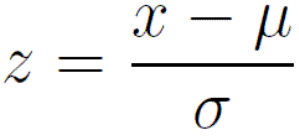

1.  From Scratch
<br>
<br>standard_units(x) receives an array (x) and converts it to standard units.

In [255]:
#converts an array into standard units.
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

In [230]:
#Example
Med_income = demographics["Median Income"].values
#list first 5 results of array.
standard_units(Med_income)[:5]

array([-0.79297708, -1.10157493, -0.8259276 , -1.15812267, -0.51133875])

### 2. Correlation
$r = average(x_standardunits * y_standardunits)$
<br>
<br>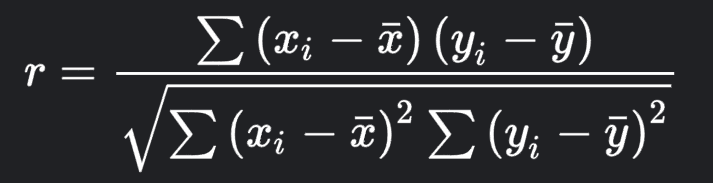

1. From Scratch, x and y defined.
<br>
<br>correlation(table, col_x, col_y) finds correlation between column x and y of a table.

In [231]:
#Finds correlation between two columns in a table.
def correlation(table, col_x, col_y):
    def standard_units(z):
        """Converts an array x to standard units"""
        return (z - np.mean(z)) / np.std(z)
    x_su = standard_units(table[col_x])
    y_su = standard_units(table[col_y])
    return np.mean(x_su * y_su)

In [232]:
#Example
correlation(demographics, 'College%', 'Median Income')

0.818464851714134

2. Pandas 
<br>df.corr()
<br> 
<br> Returns a correlation table between all numerical data.
<br>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [233]:
#finds correlation between all variables in a dataframe.
demographics.corr()

Median Income  College%
Median Income       1.000000  0.818465
College%            0.818465  1.000000

### 3. Finding Slope of Linear Regression

1. from scratch

r   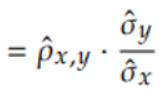

In [254]:
#Finds the slope of linear regression.
def slope(table, col_x, col_y):
    x = table[col_x]
    y = table[col_y]
    def standard_units(z):
            """Converts an array x to standard units"""
            return (z - np.mean(z)) / np.std(z)
    def correlation(table, cl_x, cl_y):
        x_su = standard_units(x)
        y_su = standard_units(y)
        return np.mean(x_su * y_su)
    r = correlation(table,x, y)
    slope_of_xy = r * np.std(table[col_y]) / np.std(table[col_x])
    return slope_of_xy

In [235]:
slope(demographics, "College%", "Median Income")

1270.7016894638818

2. Econometrics way
 <br>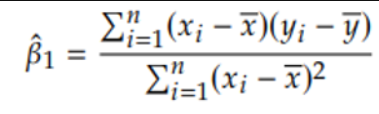

In [236]:
#Finds the slope of linear regression.
def slope_econ(table, x_column, y_column):
    xi = table[x_column]
    yi = table[y_column]
    xbar = np.average(xi)
    ybar = np.average(yi)
    return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)

In [237]:
slope_econ(demographics, "College%", "Median Income")

1270.7016894638803

### 4. Finding the Intercept in  linear regression.

1. from scratch
<br>$average(sum(yi-slope*xbar))$

In [238]:
#Finds the y intercept(b0) of a linear regression equation.
def intercept(table, x_column, y_column):
    xi = table[x_column]
    yi = table[y_column]
    xbar = np.average(xi)
    ybar = np.average(yi)
    def slope_econ(table, x_column, y_column):
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    slope = slope_econ(table, x_column, y_column)
    intercept = np.average(yi-slope*xbar)
    return intercept

In [239]:
intercept(demographics, "College%", "Median Income")

20802.577766677925

2. Econometrics way
<br>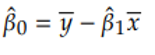

In [253]:
#Finds the y intercept(b0) of a linear regression equation.
def econ_intercept(table, x_column, y_column):
    xi = table[x_column]
    yi = table[y_column]
    xbar = np.average(xi)
    ybar = np.average(yi)
    def slope_econ(table, x_column, y_column):
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    b1 = slope_econ(table, x_column, y_column)
    return ybar - b1*xbar

In [241]:
econ_intercept(demographics, "College%", "Median Income")

20802.577766677918

### 5. Finding y using linear regression.

1. from Scratch
<br> 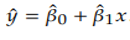

In [252]:
#returns a predicted value of y based on linear regression.
def find_y_est_given_x(x_value, table, x_column, y_column):
    xi = table[x_column]
    yi = table[y_column]
    xbar = np.average(xi)
    ybar = np.average(yi)
    def slope_econ(table, x_column, y_column):
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    b1 = slope_econ(table, x_column, y_column)
    def econ_intercept(table, x_column, y_column):
        b1 = slope_econ(table, x_column, y_column)
        return ybar-b1*xbar
    b0 = econ_intercept(table,x_column, y_column)
    return b0 + b1*x_value

In [243]:
#example
find_y_est_given_x(50, demographics, "College%", "Median Income")

84337.66223987193

6. Find best fit line

In [251]:
#prints out an equation for the best fit line. Requires a dataframe and two columns to be passed.
def best_fit_line(table, x_column, y_column):
    xi = table[x_column]
    yi = table[y_column]
    xbar = np.average(xi)
    ybar = np.average(yi)
    def slope_econ(table, x_column, y_column):
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    b1 = slope_econ(table, x_column, y_column)
    def econ_intercept(table, x_column, y_column):
        b1 = slope_econ(table, x_column, y_column)
        return ybar-b1*xbar
    b0 = econ_intercept(table,x_column, y_column)
    return print("y = " , b0 , '+' , b1 , '* x')

In [245]:
best_fit_line(demographics, "College%", "Median Income")

y =  20802.577766677918 + 1270.7016894638803 * x


7. Scatter with best fit line

1. Plotly scatter plot with best fit

px.scatter(df, x = x_column, y = y_column, trendline = 'ols')
<br> 'ols' stands for ordinary least squares

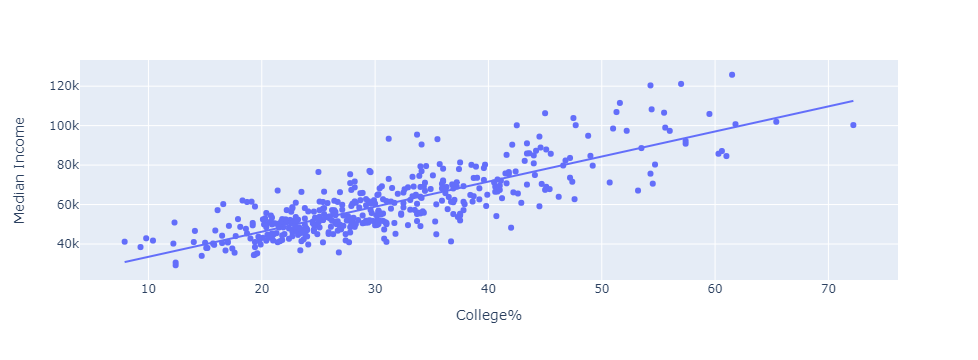

In [246]:
px.scatter(demographics, x= 'College%', y = 'Median Income', trendline = 'ols')

8. Find and plot residuals.

In [250]:
#Creates another table with a new column that shows predictions, and another that show residuals
def residuals(table, x_column, y_column):
    xi = table[x_column]
    yi = table[y_column]
    xbar = np.average(xi)
    ybar = np.average(yi)
    def slope_econ(table, x_column, y_column):
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    b1 = slope_econ(table, x_column, y_column)
    def econ_intercept(table, x_column, y_column):
        b1 = slope_econ(table, x_column, y_column)
        return ybar-b1*xbar
    b0 = econ_intercept(table,x_column, y_column)
    table['Predicted Values'] = b0 + b1*xi
    table['Residuals'] = yi - table['Predicted Values']
    return table

In [248]:
#example
residuals = residuals(demographics, "College%", "Median Income")
residuals

Median Income  College%  Predicted Values    Residuals
0            47083      24.0      51299.418314 -4216.418314
1            42035      21.8      48503.874597 -6468.874597
2            46544      22.8      49774.576286 -3230.576286
3            41110      17.0      42404.506488 -1294.506488
4            51690      30.3      59304.838957 -7614.838957
..             ...       ...               ...          ...
430          68162      36.9      67691.470108   470.529892
431          57129      26.4      54349.102369  2779.897631
432          51738      23.1      50155.786793  1582.213207
433          57888      25.4      53078.400679  4809.599321
434          59882      27.1      55238.593551  4643.406449

[435 rows x 4 columns]

Now plot the residuals

px.scatter(df, x_column, residuals)

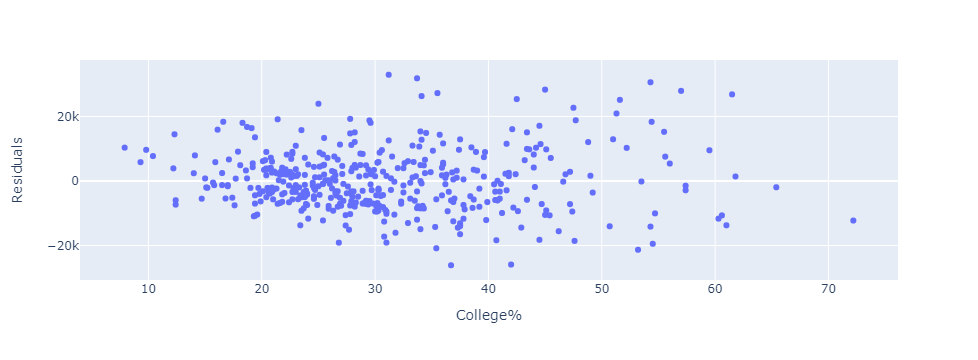

In [249]:
px.scatter(residuals, x='College%', y='Residuals')